In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from collections import Counter
from sklearn.cluster import DBSCAN
import pandas as pd
from src.utils_clustering import *
import time

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [3]:
N_CLASSES = 15

In [4]:
DATASET_FILE_NAME = "s1"
file_path = rf'..\data\processed\{DATASET_FILE_NAME}.txt'
processed_data = pd.read_csv(file_path)

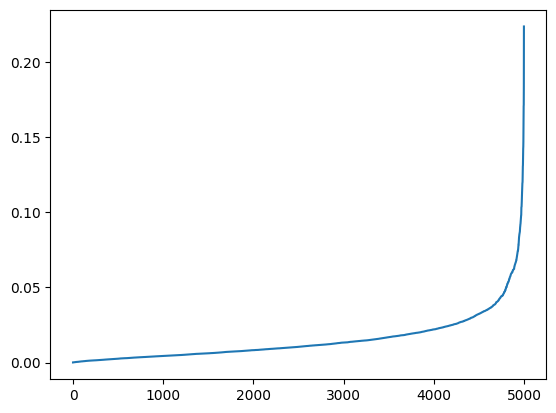

In [5]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(processed_data)

# Determine the optimal eps using the k-distance graph
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(scaled_data)
distances, indices = neighbors_fit.kneighbors(scaled_data)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)

plt.show()

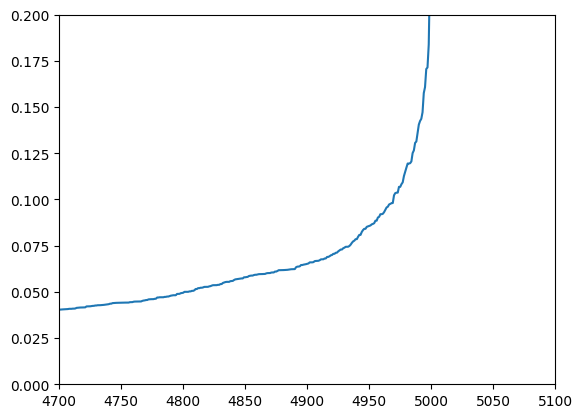

In [6]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(processed_data)

# Determine the optimal eps using the k-distance graph
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(scaled_data)
distances, indices = neighbors_fit.kneighbors(scaled_data)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)

plt.xlim(4700, 5100)  # Limit to the first 1000 points for x-axis
plt.ylim(0, 0.2)  # Adjust the y-axis to the range of interest
plt.show()

In [7]:
# Start measuring time
start_time = time.time()

# dbscan_clustering = DBSCAN(eps=0.02128, min_samples=4)
dbscan_clustering = DBSCAN(eps=0.0238, min_samples=4)
labels_pred = dbscan_clustering.fit_predict(processed_data)

# Measure elapsed time
end_time = time.time()
running_time = end_time - start_time
running_time_in_seconds = running_time / 60
running_time_in_seconds

0.00044727722803751627

In [8]:
cluster_distribution = Counter(labels_pred)
print("Predicted Distribution: ",cluster_distribution)

Predicted Distribution:  Counter({4: 994, 11: 679, 7: 665, 9: 346, 10: 332, 2: 328, 8: 328, 6: 322, 3: 315, 5: 310, 0: 287, -1: 85, 1: 5, 12: 4})


In [9]:
LABELS_FILE_NAME = 's1-label'
labels_true = load_labels_from_file(rf'..\data\label\{LABELS_FILE_NAME}.pa', len(labels_pred))
cluster_distribution = Counter(labels_true)
print(cluster_distribution)

Counter({13: 350, 14: 350, 15: 350, 12: 349, 11: 347, 10: 342, 9: 341, 8: 338, 7: 334, 6: 326, 5: 325, 4: 318, 2: 316, 3: 314, 1: 300})


In [10]:
clustering_algorithm_name = 'DBSCAN_clustering'
dataset_name = DATASET_FILE_NAME
results_path = r'../results/metrics/results.csv'

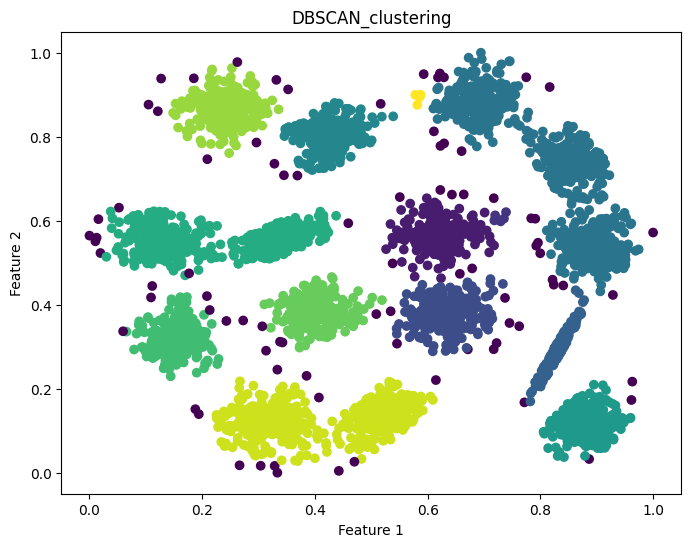

In [11]:
plot_clusters(processed_data, labels_pred, title=clustering_algorithm_name)

In [12]:
labels_pred = map_clusters_to_ground_truth_dbscan(labels_true, labels_pred)

Confusion Matrix:


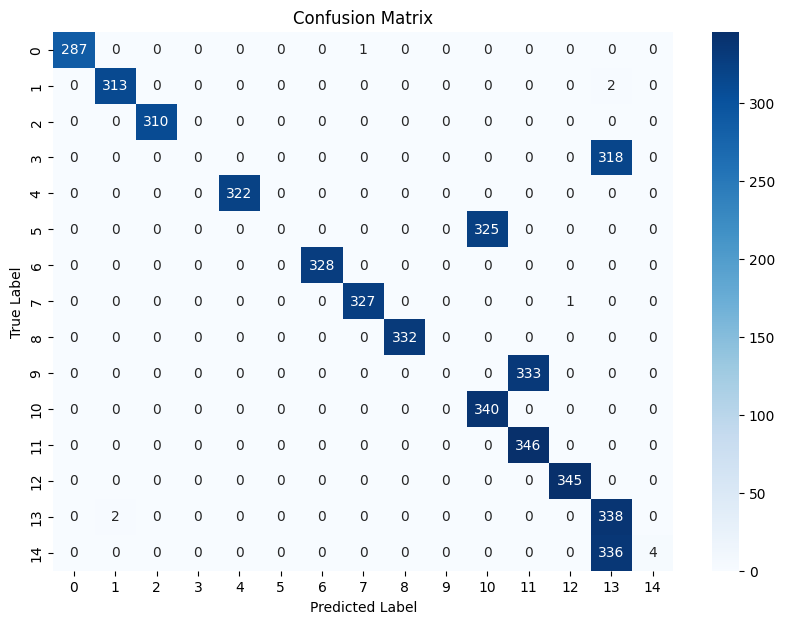


Overall Accuracy: 71.84%
This represents the proportion of all data points that were correctly grouped by the clustering algorithm.


In [13]:
generate_confusion_matrix(labels_true, labels_pred, N_CLASSES)

In [14]:
algorithm_params = dbscan_clustering.get_params()
algorithm_details = str(algorithm_params)

In [15]:
# Evaluate and save results
evaluate_clustering(X=processed_data, labels_true=labels_true, labels_pred=labels_pred,
                    clus_algo_name=clustering_algorithm_name, dataset_name=dataset_name, 
                    results_path=results_path, algorithm_details=algorithm_details, 
                    running_time=running_time)